In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"D:/Excel_csv/Netflix/NetFlix.csv")

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [4]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787.000000,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,NaN,492,7769
top,s999,Movie,Blue Jay,"Raúl Campos, Jan Suter",David Attenborough,United States,01-Jan-20,NaN,TV-MA,NaN,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,NaN,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,69.122769,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,50.950743,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,88.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,106.000000,NaN,NaN


In [5]:
# Data cleaning
df.dropna(subset=['date_added'], inplace=True)
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1956\3326837715.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
plt.figure(figsize=(8, 8))
plt.suptitle('Netflix Content Analysis', fontsize=20, y=1.02)

Text(0.5, 1.02, 'Netflix Content Analysis')

<Figure size 800x800 with 0 Axes>

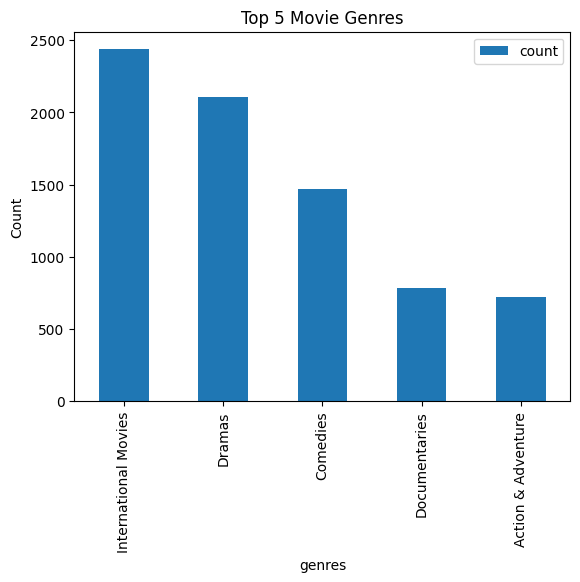

In [8]:
# 1. Most frequent genre of movie and TV show
movie_genres = df[df['type']=='Movie']['genres'].str.split(',').explode().str.strip()
tvshow_genres = df[df['type']=='TV Show']['genres'].str.split(',').explode().str.strip()

movie_genre_counts = movie_genres.value_counts().head(5)
tvshow_genre_counts = tvshow_genres.value_counts().head(5)

movie_genre_counts.plot(kind='bar', ax=plt.gca(), title='Top 5 Movie Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'International TV Shows'),
  Text(1, 0, 'TV Dramas'),
  Text(2, 0, 'TV Comedies'),
  Text(3, 0, 'Crime TV Shows'),
  Text(4, 0, "Kids' TV")])

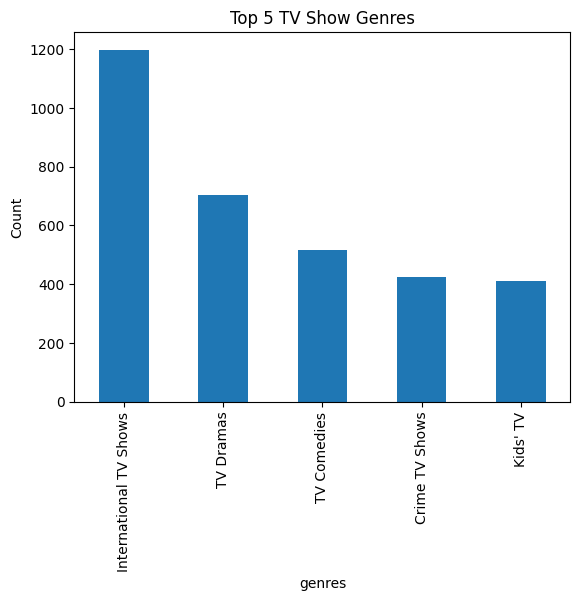

In [9]:
tvshow_genre_counts.plot(kind='bar', ax=plt.gca(), title='Top 5 TV Show Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)

Text(0.5, 0, 'Year')

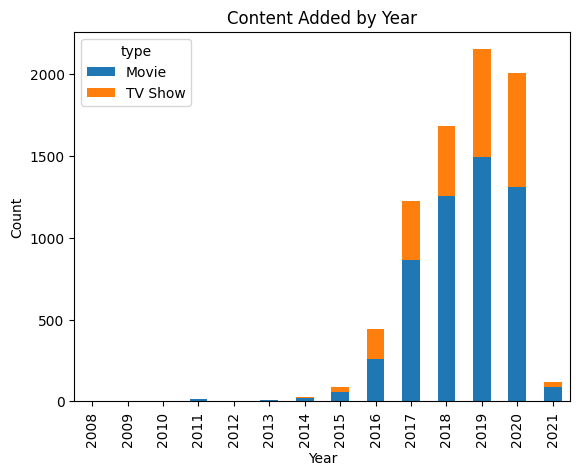

In [10]:
# 2. Content added by year
yearly_content = df.groupby(['year_added', 'type']).size().unstack()
yearly_content.plot(kind='bar', stacked=True, ax=plt.gca(), title='Content Added by Year')
plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 0, 'Appearances')

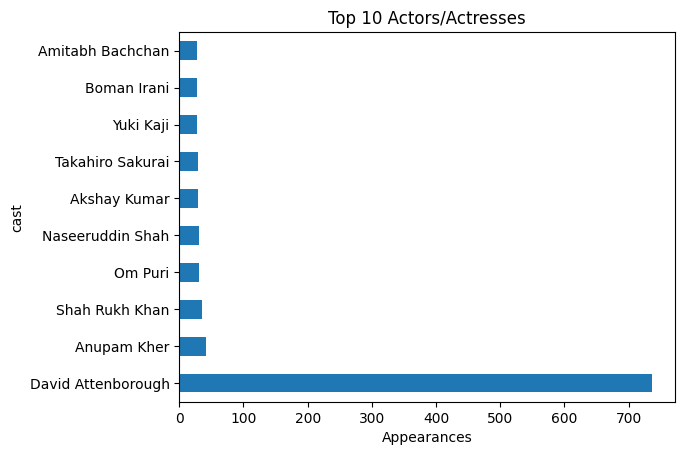

In [11]:
# 3. Top actors
top_actors = df['cast'].str.split(', ').explode().value_counts().head(10)
top_actors.plot(kind='barh', ax=plt.gca(), title='Top 10 Actors/Actresses')
plt.xlabel('Appearances')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Egypt'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'Philippines'),
  Text(7, 0, 'Turkey'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'Japan')])

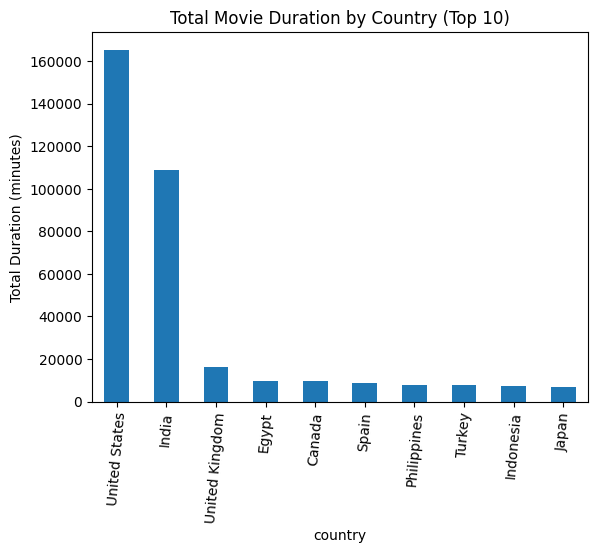

In [12]:
# 4. Movie duration by country (top 10)
movie_duration = df[df['type']=='Movie'].groupby('country')['duration'].sum().sort_values(ascending=False).head(10)
movie_duration.plot(kind='bar', ax=plt.gca(), title='Total Movie Duration by Country (Top 10)')
plt.ylabel('Total Duration (minutes)')
plt.xticks(rotation=85)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'South Korea'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'United States, Canada'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Taiwan')])

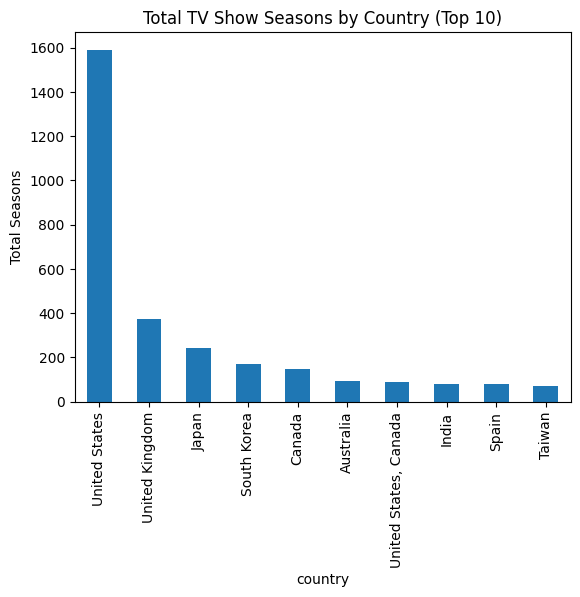

In [13]:
# 5. TV Show duration by country (top 10)
tv_duration = df[df['type']=='TV Show'].groupby('country')['duration'].sum().sort_values(ascending=False).head(10)
tv_duration.plot(kind='bar', ax=plt.gca(), title='Total TV Show Seasons by Country (Top 10)')
plt.ylabel('Total Seasons')
plt.xticks(rotation=90)

Text(0, 0.5, 'Year')

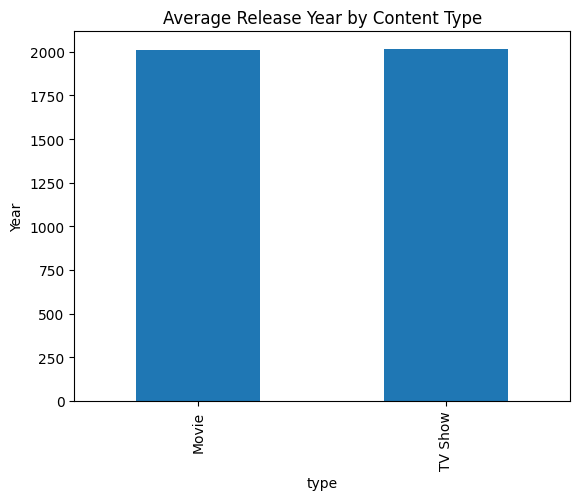

In [14]:
# 6. Average release year
avg_release = df.groupby('type')['release_year'].mean()
avg_release.plot(kind='bar', ax=plt.gca(), title='Average Release Year by Content Type')
plt.ylabel('Year')

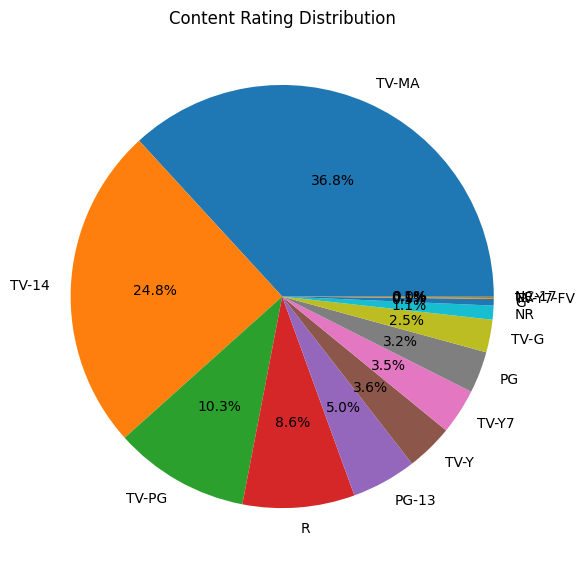

In [15]:
# 7. Rating distribution
plt.figure(figsize=(6,6))
rating_counts = df['rating'].value_counts()
rating_counts.plot(kind='pie', autopct='%1.1f%%', ax=plt.gca(), title='Content Rating Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

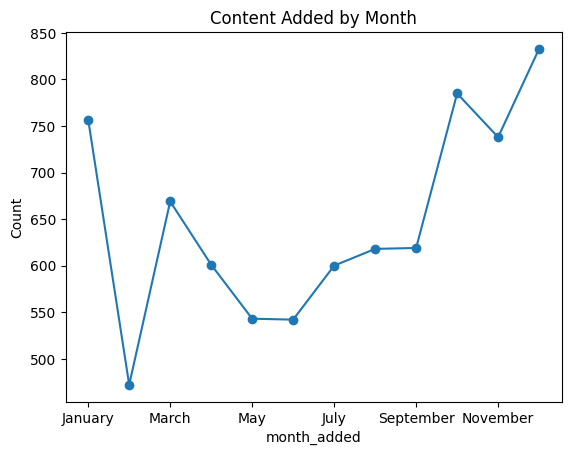

In [16]:

# 8. Monthly additions
monthly_additions = df['month_added'].value_counts()
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']
monthly_additions = monthly_additions.reindex(monthly_order)
monthly_additions.plot(kind='line', marker='o', title='Content Added by Month')
plt.ylabel('Count')

Text(0.5, 0, 'Duration (minutes)')

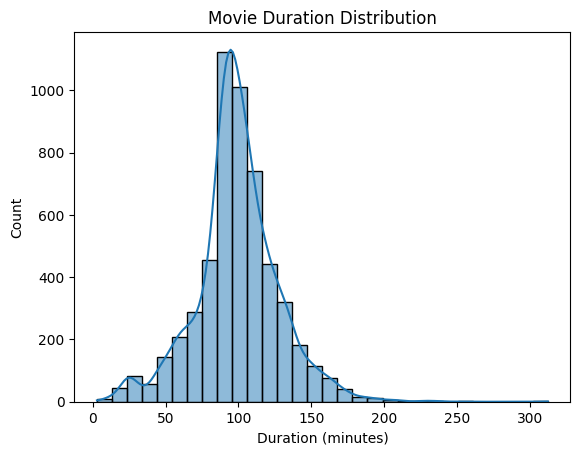

In [17]:
# 9. Content duration distribution
movies = df[df['type']=='Movie']
sns.histplot(movies['duration'], bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')

Text(0.5, 0, 'Number of Seasons')

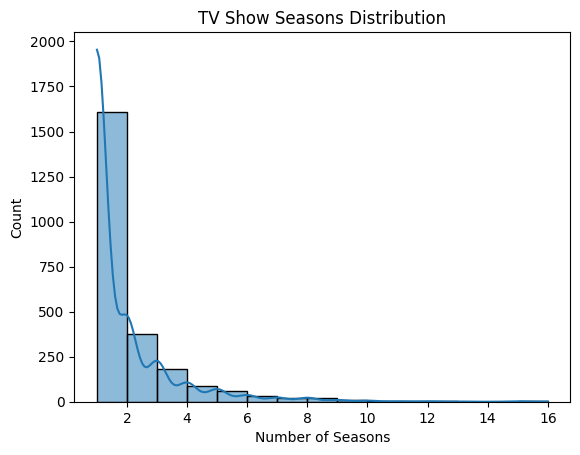

In [18]:
# 10. TV Show seasons distribution
tv_shows = df[df['type']=='TV Show']
sns.histplot(tv_shows['duration'], bins=15, kde=True)
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')

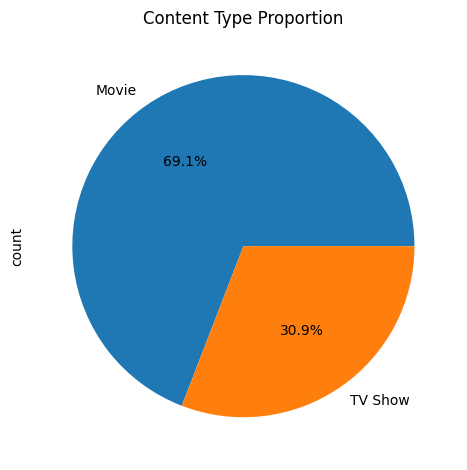

In [19]:
# 11. Content type proportion
type_counts = df['type'].value_counts()
type_counts.plot(kind='pie', autopct='%1.1f%%', title='Content Type Proportion')
plt.tight_layout()
plt.show()

In [20]:
# Print key insights
print("\nKey Insights:")
print(f"1. Most movies are International Movies ({movie_genre_counts[0]}), while most TV shows are International TV Shows ({tvshow_genre_counts[0]})")
print(f"2. Peak content addition was in 2019 with {yearly_content.loc[2019].sum()} titles added")
print(f"3. David Attenborough appears most frequently ({top_actors[0]} times)")
print(f"4. US has the highest total movie duration ({movie_duration[0]} minutes) and TV show seasons ({tv_duration[0]})")
print(f"5. Average release year: Movies - {avg_release['Movie']:.0f}, TV Shows - {avg_release['TV Show']:.0f}")
print(f"6. Most common rating is TV-MA ({rating_counts['TV-MA']} titles)")


Key Insights:
1. Most movies are International Movies (2437), while most TV shows are International TV Shows (1198)
2. Peak content addition was in 2019 with 2153.0 titles added
3. David Attenborough appears most frequently (736 times)
4. US has the highest total movie duration (165378 minutes) and TV show seasons (1591)
5. Average release year: Movies - 2013, TV Shows - 2016
6. Most common rating is TV-MA (2861 titles)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1956\1823467330.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"1. Most movies are International Movies ({movie_genre_counts[0]}), while most TV shows are International TV Shows ({tvshow_genre_counts[0]})")
C:\Users\DELL\AppData\Local\Temp\ipykernel_1956\1823467330.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"3. David Attenborough appears most frequently ({top_actors[0]} times)")
C:\Users\DELL\AppData\Local\Temp\ipykernel_1956\1823467330.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer k